In [1]:
# This is experiemental
# import needed libraries and the stocks and market you want as well as the market

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

sp500 = '^GSPC'

tickers = ['AAPL','GOOG','T','F','AMZN']


start_date = '2021-01-01'
end_date = '2023-12-16'



In [2]:
# df_500 is the S&P500 and 'df' is just the stock tickers listed above
df_500 = yf.download(sp500, start=start_date, end=end_date)['Close']

df = yf.download(tickers, start=start_date, end=end_date)['Close']


returns = df.pct_change().dropna()


risk_free_rate = 0.05


expected_returns = returns.mean()


cov_matrix = returns.cov()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed


In [3]:
# These weights are equally weighted, however, they are not accurate in terms of maximizing the sharpe ratio
weights = [0.2, 0.2, 0.2, 0.2, 0.2]


portfolio_expected_return = np.dot(expected_returns, weights)


portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))


sharpe_ratio = ((portfolio_expected_return - risk_free_rate)) / (portfolio_volatility)


print('Portfolio Expected Return:', portfolio_expected_return)
print('Portfolio Volatility (Standard Deviation):', portfolio_volatility)
print('Sharpe Ratio:', sharpe_ratio)

Portfolio Expected Return: 0.0004531547740888475
Portfolio Volatility (Standard Deviation): 0.01492452300768199
Sharpe Ratio: -3.3198277224946


Correlation Matrix:
          0         1         2         3         4         5         6   \
0   1.000000  0.608837  0.379821  0.664513  0.197814  0.092425 -0.001317   
1   0.608837  1.000000  0.325482  0.667787  0.167381  0.007505  0.019880   
2   0.379821  0.325482  1.000000  0.353355  0.252428  0.017199  0.011300   
3   0.664513  0.667787  0.353355  1.000000  0.151084  0.046840 -0.003209   
4   0.197814  0.167381  0.252428  0.151084  1.000000  0.094572  0.020778   
5   0.092425  0.007505  0.017199  0.046840  0.094572  1.000000  0.584896   
6  -0.001317  0.019880  0.011300 -0.003209  0.020778  0.584896  1.000000   
7   0.039915  0.028916  0.068374  0.061186  0.014505  0.599759  0.564696   
8   0.070930  0.008985  0.047475  0.044768  0.081254  0.815965  0.718755   
9   0.134467  0.020137  0.004176  0.084003 -0.015456  0.506443  0.352421   
10 -0.000781  0.041908 -0.112747 -0.026976 -0.040523  0.464273  0.544066   
11  0.015996 -0.170697  0.046765 -0.003604 -0.017620  0.361944  0.51

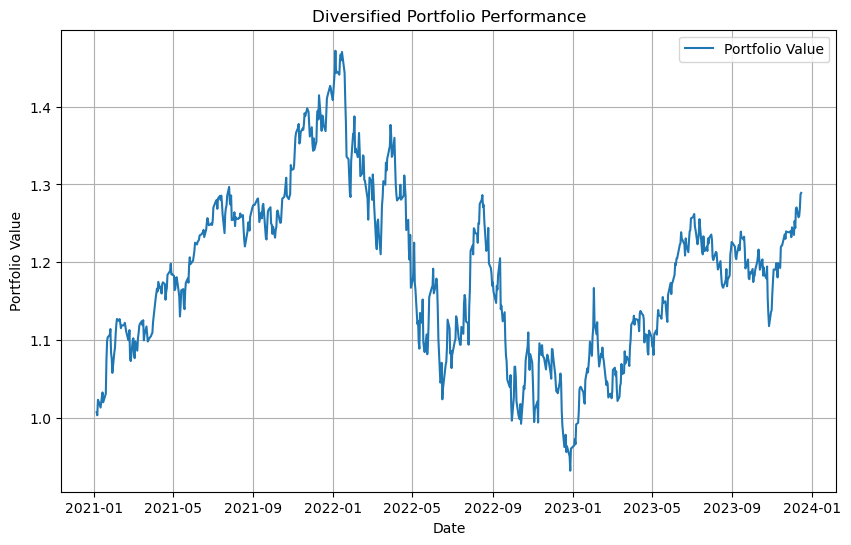

In [4]:
# This part is the part that is experimental. 
# polynomial \features is going to raise all of the values in the in the selected assets to a ridiculous amount
# looks cool though


degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
returns_poly = poly.fit_transform(returns)


correlation_matrix = pd.DataFrame(returns_poly).corr()


print('Correlation Matrix:')
print(correlation_matrix)


portfolio_value = (returns.dot(weights) + 1).cumprod()
plt.figure(figsize=(10,6))
plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value')
plt.title('Diversified Portfolio Performance')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.show()